# Optimizing behaviour in Bertrand and Cournot competition

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
from numpy import array 
from scipy import arange
import sympy as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import randrange
from modelproject import run_bertrand_model
from modelproject import run_cournot_model


# Model description

**The Bertrand model** is a model of competition in which two firms produce a homogenous good and compete by setting the prices simultaneusly. The firms ends up selling their good at the marginal cost and making zero profits. 
The demand for firm 1 depends on the price set by its rival:


**The total demand**

$$
q=D(p)
$$

*The individual demand by firm 1*
$$
D_1\left(p_1, p_2\right)= \begin{cases}D\left(p_1\right) & \text { if } p_1<p_2 \text { captures all demand } \\ \frac{1}{2} D\left(p_1\right) & \text { if } p_1=p_2 \text { (or any other quantity) } \\ 0 & \text { if } p_1>p_2 \text { loses all the demand }\end{cases}
$$
*The profit of the individual firm*
$$
\pi_1\left(p_1, p_2\right)= \begin{cases}0 & \text { if } p_1>p_2 \\ \left(p_1-c\right) \frac{1}{2} D\left(p_1\right) & \text { if } p_1=p_2 \\ \left(p_1-c\right) D\left(p_1\right) & \text { if } p_1<p_2\end{cases}
$$

*The normal form:*

Firms: $I=\{F i r m _1, Firm _2\}$\
Strategy sets: $S_i:=(R)^{+}$\
Pay-offs: $\pi_i\left(p_i, p_j\right)$

*The parameters is set to the following:*

Maximum price $a = 20$   
The elasticity $b = 0.5$
The price change made by each firm after one period: $ = 0.1$ 

The starting prices for each firm\
$p_1 = 15$\
$p_2 = 18$

The quanity is given by:\
$q_1 = a - p_1 * b$\
$q_2 = a - p_2 * b$

The profit is given by: \
$\pi_1 = (p_1 - c) * q_1$\
$\pi_2 = (p_2 - c) * q_2$

## Analytical solution

In this section we solve a bertrand game of 2 firm analytically. The 2 firms have different demand functions but they face the same marginal cost. We will be using sympy in the section.

In [2]:
# We define the variables that we will use later on
p1, p2 = sm.symbols('p1 p2', real=True)
qne = sm.symbols('Q_NE', real=True)
pne = sm.symbols('P_NE', real = True)
q1,q2 = sm.symbols('q1 q2', real=True)
P1, P2 = sm.symbols('\Pi_1 \Pi_2', real=True)
c = sm.symbols('c', real=True)

In [7]:
# First we define the demand function from the 2 firms
firm_1_demand = sm.Eq(q1, 13 - 0.5*p1 + p2)
firm_2_demand = sm.Eq(q1,  18 + p1 - 0.5*p2)

print('Demand functions')

display(firm_1_demand)
display(firm_2_demand)

# Then we calculate the profit functions from the 2 firms
firm_1_profit = sm.Eq(P1, p1*(13 - 0.5*p1 + p2)-c*(13 - 0.5*p1 + p2))
firm_2_profit = sm.Eq(P2, p2*(18 + p1 -0.5*p2)-c*(18 + p1 - 0.5*p2))

print('Profit functions')

display(firm_1_profit)
display(firm_2_profit)

# Now we calculate the first order conditions for the 2 firms and set equal to zero
foc_1 = sm.diff(p1*(13 - 0.5*p1 + p2)-c*(13 - 0.5*p1 + p2),p1)
foc_2 = sm.diff(p2*(18 + p1 - 0.5*p2)-c*(18 + p1 - 0.5*p2),p2)

print('First order conditions')

display(sm.Eq(FOC_1,0))
display(sm.Eq(FOC_2,0))

# Now we calculate the 2 firms reaction functions
reac1 = sm.solve(FOC_1,p1)
reac2 = sm.solve(FOC_2,p2)

reac1_1 = sm.Eq(reac1[0],p1)
reac2_2 = sm.Eq(reac2[0],p2)

print('Reaction functions') 

display(reac1_1)
display(reac2_2)

# now we isolate p2 in firm 1 reaction function, so that we can set them equal to each other
reac1_p2 = sm.solve(reac1_1, p2)
reac11_p2 = sm.Eq(reac1_p2[0],p2)

print('P2 isolated in firm 1 reaction')
display(reac11_p2)

# We set the reaftion functions equal to each other
equal = sm.Eq(reac2[0],reac1_p2[0])

print('Reaction functions from firm 1 and 2 is set to equal')

display(equal)

# We calculate the the nash equilibrium price 
nep = c + 31 

nep1 = sm.Eq(pne,nep)

print('Nash equilibrium price')

display(nep1)

# We insert the price in the demand function and then we get the Nash equilibrium quantity
neq = sm.Eq(qne, 13 - 0.5*nep + nep)

print('Nash quilibrium quantity')

display(neq)


Demand functions


Eq(q1, -0.5*p1 + p2 + 13)

Eq(q1, p1 - 0.5*p2 + 18)

Profit functions


Eq(\Pi_1, -c*(-0.5*p1 + p2 + 13) + p1*(-0.5*p1 + p2 + 13))

Eq(\Pi_2, -c*(p1 - 0.5*p2 + 18) + p2*(p1 - 0.5*p2 + 18))

First order conditions


Eq(0.5*c - 1.0*p1 + p2 + 13, 0)

Eq(0.5*c + p1 - 1.0*p2 + 18, 0)

Reaction functions


Eq(0.5*c + p2 + 13.0, p1)

Eq(0.5*c + p1 + 18.0, p2)

P2 isolated in firm 1 reaction


Eq(-0.5*c + p1 - 13.0, p2)

Reaction functions from firm 1 and 2 is set to equal


Eq(0.5*c + p1 + 18.0, -0.5*c + p1 - 13.0)

Nash equilibrium price


Eq(P_NE, c + 31)

Nash quilibrium quantity


Eq(Q_NE, 0.5*c + 28.5)

We find that the nash equilibrium price is c + 31 and the quantity is 0.5c + 28.5 Beacuse of symetri this will also be the equilibrium price and quantity for firm 1. 

## Numerical solution

Our Bertrand model takes the inputs: Startingvalue $p_1$, startingvalue $p_2$, marginal cost, maximum total quantity for weakly positive prices and numer of periods in the simulation.

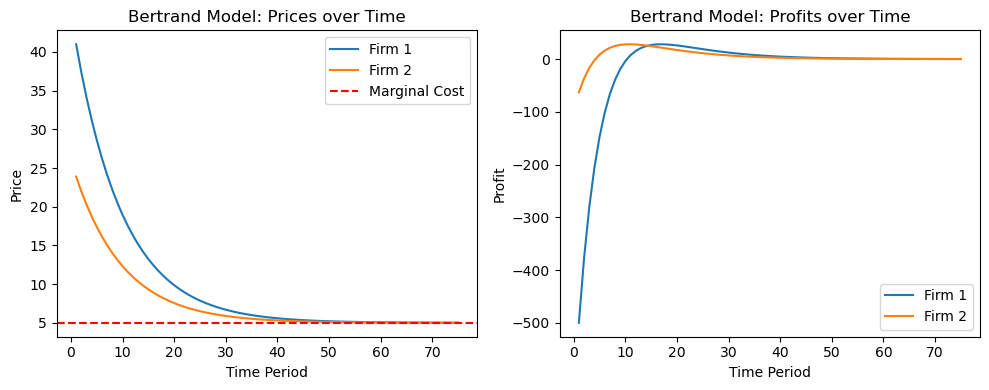

Equilibrium Period: None


In [8]:
run_bertrand_model(randrange(50), randrange(50), 5, 50, 75)

The outcome of the prices over time is what we would expect since the Bertrand competition with homogeneous goods leads to that the prices converges  equals the marginal costs.
$p_1=p_2=c_1=c_2=c$ in the last time period. No other price could be an equilibrium. If both firms set the same price above the marginal cost and share the market, then both of the firms has an incentive to under bid the other by an small amount and capture the whole market and almost double its profits. This is due to the two firms competing over goods that are substitutes. Also there can be no equilibrium with firms setting different prices. The firms setting the higher price will earn nothing since the lower priced firm serves all of the customers. Hence the higher priced firm will want to lower its price to under bid the lower-priced firm. The only equilibrium in the Bertrand model is when both firms set price equal to the marginal cost.


The outcome is the profits over times will decrease and a time periode since the two firms will over bid untill the the profit is equal to zero.

# The Cournot model
Cournot competition is a game between a finite number of firms supplying the same good. In contrary to perfect competition all the individual suppliers have market power that enable them to effect prices in the market through the quantity produced. The market will clear at any quantity supplied through the mechanism of lowering prices.

In a market with $n$ firms, where firm $i\in[1,2,...,n]$, we have a price function depending on the quantities produced $p(q_1,q_2,...,q_n)$ where
$$\frac{\partial p(q_1,q_2,...,q_n)}{\partial q_i}=\frac{\partial p(q_1,q_2,...,q_n)}{\partial q_j}<0$$
Every firm has constant and identical marginal costs $(c_i=c_j=c)$. Firm $i$ will choose $q_i$ in order to maximize the profit function
$$\pi(q_i)=p(q_1,q_2,...,q_n)q_i-cq_i$$

Our Cournot model takes the inputs: Startingvalue $q_1$, startingvalue $q_2$, marginal cost, maximum total quantity for weakly positive prices and numer of periods in the simulation.

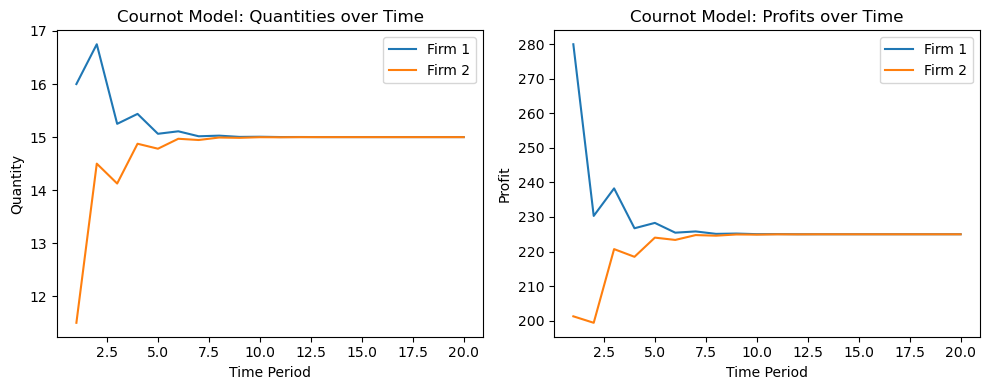

Price: [20.00024414]
Quantity - Firm 1: 15.0
Quantity - Firm 2: 15.0
Profit - Firm 1: 225.007
Profit - Firm 2: 224.996


In [9]:
run_cournot_model(randrange(45), randrange(45), 5, 50, 20)

In this Cournot model each firm choses the best response to the quatity choses by the other firm in the previous period. Overt time price, quantities and profits will converge to equilibrium.